In [1]:
from analysis import ANALYSIS_CONFIGS
from analysis.analysis import FinancialAnalysis
from analysis.doc_utils import ReportDocument

In [2]:
ANALYSIS_CONFIGS

['all_analysis.json',
 'asset_quality_analysis.json',
 'asset_indepth_analysis.json',
 'asset_fraud_analysis.json',
 'profit_analysis.json',
 'cash_flow_analysis.json']

In [3]:
analysis = FinancialAnalysis(ANALYSIS_CONFIGS[4])
images, titles, fields = analysis.images, analysis.titles, analysis.fields

### 营业收入及增长率

In [4]:
t1 = analysis.init_table('t1')
t1['营业收入增长率'] = t1['其中：营业收入(元)'].pct_change()

analysis.format_show_table('t1')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
营业收入增长率,nan%,28.54%,54.18%,36.49%,20.24%,5.13%


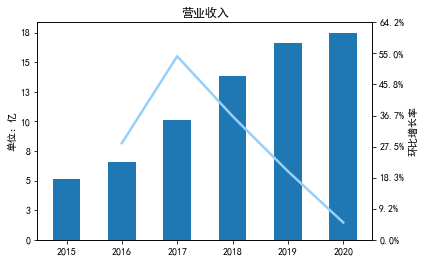

In [5]:
analysis.show_plot('t1')

### 毛利率及毛利率波动

In [6]:
t2 = analysis.init_table('t2')
t2['毛利率'] = (t2['其中：营业收入(元)'] - t2['其中：营业成本(元)']) / t2['其中：营业收入(元)']
t2['毛利率波动率'] = t2['毛利率'].pct_change()

analysis.format_show_table('t2')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
其中：营业成本(元),"244,253,900","300,724,100","472,741,100","678,856,000","782,854,800","836,451,700"
毛利率,52.84%,54.82%,53.94%,51.54%,53.53%,52.76%
毛利率波动率,nan%,3.76%,-1.61%,-4.45%,3.85%,-1.42%


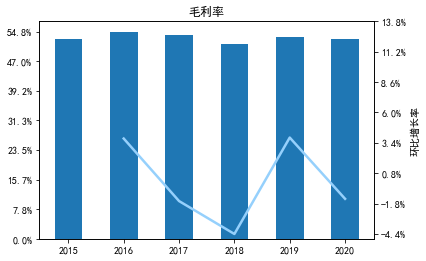

In [7]:
analysis.show_plot('t2')

### 期间费用率

In [8]:
t3 = analysis.init_table('t3')
t3.loc[t3['财务费用(元)']<0, '财务费用(元)'] = 0
t3['四费合计'] = t3.T[:4].sum()
t3['期间费用率'] = t3['四费合计'] / t3['其中：营业收入(元)']
t3['毛利率'] = t2['毛利率']
t3['期间费用率占毛利率的比率'] = t3['期间费用率'] / t3['毛利率']

analysis.format_show_table('t3')

,2015,2016,2017,2018,2019,2020
销售费用(元),"62,629,900","55,483,900","100,732,100","154,464,100","256,658,500","198,692,600"
管理费用(元),"62,775,000","79,550,900","82,973,600","80,703,600","65,784,400","61,820,000"
研发费用(元),0,0,"33,437,800","40,767,800","50,926,200","54,276,900"
财务费用(元),0,0,0,0,0,0
四费合计,"125,404,900","135,034,800","217,143,500","275,935,500","373,369,100","314,789,500"
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
期间费用率,24.22%,20.29%,21.16%,19.70%,22.17%,17.78%
毛利率,52.84%,54.82%,53.94%,51.54%,53.53%,52.76%
期间费用率占毛利率的比率,45.83%,37.00%,39.22%,38.22%,41.41%,33.69%


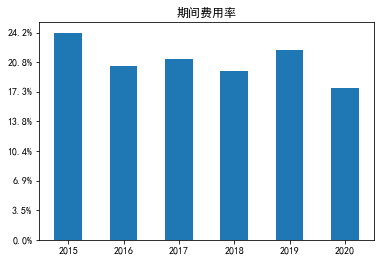

In [9]:
analysis.show_plot('t3')

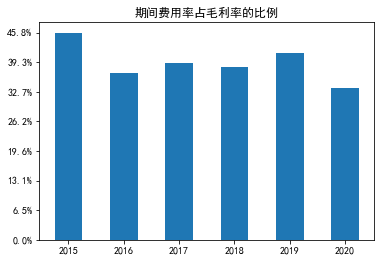

In [10]:
analysis.show_plot('t3', image_index=1)

### 销售费用率

In [11]:
t4 = analysis.init_table('t4')
t4['销售费用率'] = t4['销售费用(元)'] / t4['其中：营业收入(元)']

analysis.format_show_table('t4')

,2015,2016,2017,2018,2019,2020
销售费用(元),"62,629,900","55,483,900","100,732,100","154,464,100","256,658,500","198,692,600"
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
销售费用率,12.09%,8.33%,9.81%,11.03%,15.24%,11.22%


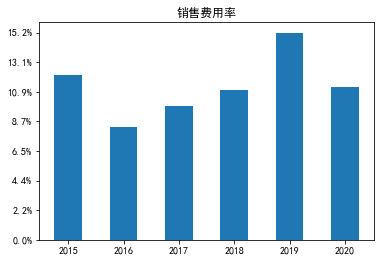

In [12]:
analysis.show_plot('t4')

### 主营利润率

In [13]:
t5 = analysis.init_table('t5')
t5['四费合计'] = t3['四费合计']
t5['主营利润'] = t5['其中：营业收入(元)'] - t5.T[1:4].sum()
t5['主营利润率'] = t5['主营利润'] / t5['其中：营业收入(元)']
t5['主营利润占营业利润的比率'] = t5['主营利润'] / t5['三、营业利润(元)']

analysis.format_show_table('t5')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"517,877,289","665,683,622","1,026,358,727","1,400,899,590","1,684,475,727","1,770,817,768"
其中：营业成本(元),"244,253,900","300,724,100","472,741,100","678,856,000","782,854,800","836,451,700"
营业税金及附加(元),"4,576,200","8,659,100","12,590,100","15,388,000","12,378,700","17,545,500"
四费合计,"125,404,900","135,034,800","217,143,500","275,935,500","373,369,100","314,789,500"
主营利润,"143,642,289","221,265,622","323,884,027","430,720,090","515,873,127","602,031,068"
主营利润率,27.74%,33.24%,31.56%,30.75%,30.63%,34.00%
三、营业利润(元),"172,276,538","240,639,873","358,999,257","445,604,542","534,758,624","635,352,096"
主营利润占营业利润的比率,83.38%,91.95%,90.22%,96.66%,96.47%,94.76%


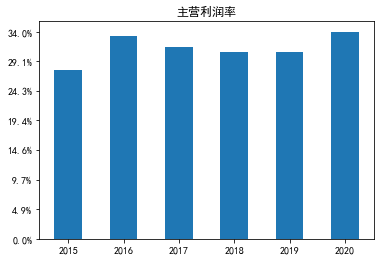

In [14]:
analysis.show_plot('t5')

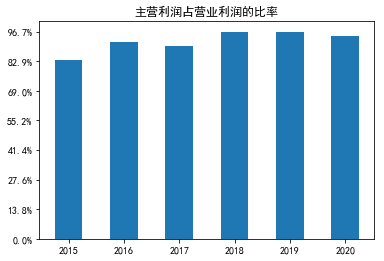

In [15]:
analysis.show_plot('t5', image_index=1)

### 营业外收入净额

In [16]:
t6 = analysis.init_table('t6')
t6['营业外收入净额'] = t6['加：营业外收入(元)'] - t6['减：营业外支出(元)']
t6['营业外收入净额占利润总额的比率'] = t6['营业外收入净额'] / t6['四、利润总额(元)']

analysis.format_show_table('t6')

,2015,2016,2017,2018,2019,2020
加：营业外收入(元),"10,943,100","2,070,600","229,900","121,000","117,700","515,900"
减：营业外支出(元),"2,047,500","5,599,500","294,700","1,638,300","580,800","1,805,700"
营业外收入净额,"8,895,600","-3,528,900","-64,800","-1,517,300","-463,100","-1,289,800"
四、利润总额(元),"181,172,200","237,110,900","358,934,400","444,087,300","534,295,600","634,062,300"
营业外收入净额占利润总额的比率,4.91%,-1.49%,-0.02%,-0.34%,-0.09%,-0.20%


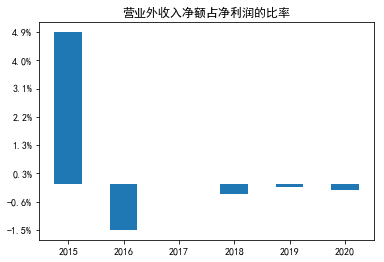

In [17]:
analysis.show_plot('t6')

### 归母净利润及增速

In [18]:
t7 = analysis.init_table('t7')
t7['归属于母公司所有者的净利润增长率'] = t7.pct_change()

analysis.format_show_table('t7')

,2015,2016,2017,2018,2019,2020
归属于母公司所有者的净利润(元),"155,641,200","202,656,100","305,192,100","377,525,100","460,012,900","543,562,800"
归属于母公司所有者的净利润增长率,nan%,30.21%,50.60%,23.70%,21.85%,18.16%


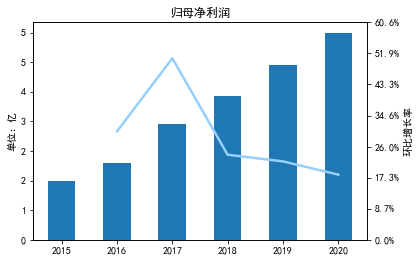

In [19]:
analysis.show_plot('t7')

### 输出分析报告

In [20]:
ReportDocument(analysis).save()